<a href="https://colab.research.google.com/github/lcbjrrr/quantai/blob/main/J_Reg_Lin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
versioninfo()

Julia Version 1.10.8
Commit 4c16ff44be8 (2025-01-22 10:06 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, broadwell)
Threads: 2 default, 0 interactive, 1 GC (on 2 virtual cores)
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = 2


# Linear Regression


In [2]:

import Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Statistics")
Pkg.add("StatsPlots")
using CSV
using DataFrames
using Statistics
using StatsPlots


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [3]:
Pkg.add("GLM")
using GLM

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [4]:
#Pkg.add("MLBase")
#using GLM

In [5]:
;wget https://raw.githubusercontent.com/lcbjrrr/quantai/refs/heads/main/datasets/autos.csv

--2025-03-14 22:10:43--  https://raw.githubusercontent.com/lcbjrrr/quantai/refs/heads/main/datasets/autos.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 518 [text/plain]
Saving to: ‘autos.csv.2’

     0K                                                       100% 23.8M=0s

2025-03-14 22:10:43 (23.8 MB/s) - ‘autos.csv.2’ saved [518/518]



In [6]:
;wget https://raw.githubusercontent.com/lcbjrrr/quantai/refs/heads/main/datasets/auto_ts.csv

--2025-03-14 22:10:43--  https://raw.githubusercontent.com/lcbjrrr/quantai/refs/heads/main/datasets/auto_ts.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48 [text/plain]
Saving to: ‘auto_ts.csv.1’

     0K                                                       100%  715K=0s

2025-03-14 22:10:44 (715 KB/s) - ‘auto_ts.csv.1’ saved [48/48]



In [7]:
#read csv: train data
train=CSV.read("autos.csv", DataFrame)
first(train,5)

Row,age,gender,premium
,Int64,Int64,Int64
1,23,1,333
2,24,0,320
3,31,1,301
4,33,0,280
5,40,1,270


In [8]:
#read csv: test data
test=CSV.read("auto_ts.csv", DataFrame)
first(test,3)

Row,age,gender,premium
,Int64,Int64,Int64
1,33,1,305
2,33,0,295
3,35,1,300


## Correlation and Scatterplot

In [9]:
#Correlation
cor(train.age,train.premium)

-0.9790754604636568

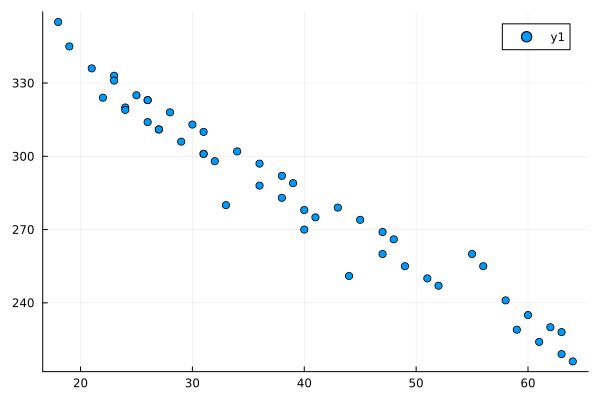

In [10]:
scatter(train.age,train.premium)

## Linear Regression

In [11]:
#train, test = TrainTestSplit(df,.80)
#train_split, test_split = splitobs(train, at = 0.8) # Splits into 80% train, 20% test
linreg = lm(@formula(premium ~ age + gender), train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

premium ~ 1 + age + gender

Coefficients:
──────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error       t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  380.633     2.74921    138.45    <1e-62  375.102    386.164
age           -2.56967   0.0622045  -41.31    <1e-37   -2.69481   -2.44453
gender         9.01459   1.6942       5.32    <1e-05    5.6063    12.4229
──────────────────────────────────────────────────────────────────────────

In [12]:
function predict_ap3(ap1, ap2)
  ap3 = -0.387663*ap1 + 1.35408*ap2 + -0.49022
  return ap3
end
predict_ap3(8,8)



7.241116

In [13]:
pred_train = predict(linreg,train)

50-element Vector{Union{Missing, Float64}}:
 330.54506065857873
 318.9607972270362
 309.98769497400343
 295.833760831889
 286.86065857885615
 267.5673830155979
 248.31559792027736
 236.73133448873486
 343.39341421143837
 331.80915077989584
 322.836048526863
 311.2517850953205
 302.27868284228765
   ⋮
 325.40571923743494
 313.8214558058924
 309.98769497400343
 298.4034315424609
 289.4303292894281
 275.2763951473136
 266.3032928942808
 247.0100173310225
 227.75823223570202
 216.1739688041595
 322.836048526863
 311.2517850953205

In [14]:
r2(linreg)


0.9741562690934751

In [15]:
pred_test=predict(linreg,test)


3-element Vector{Union{Missing, Float64}}:
 304.8483535528596
 295.833760831889
 299.7090121317157

In [16]:
function R2(y,pred)
  y_mean = mean(test.premium)
  tss = sum((test.premium .- y_mean).^2)
  rss = sum((test.premium .- pred_test).^2)
end
R2(test.premium,pred_test)

0.802827709211145

In [18]:
function MSE(y, pred)
  return mean((y .- pred).^2)
end
print(MSE(test.premium,pred_test))
sqrt(MSE(test.premium,pred_test))

0.267609236403715

0.5173096136780323